In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/home/paul/Documents/Portfolio/New_vehicle_sales/NEWMVSALES.xls")
all_cars = df.loc[df['Vehicle Type'] == 'Total Vehicles']
all_cars = all_cars.loc[all_cars['Adjustment Type'] == 'Original']
cols = 'TIME', 'Value', 'Region'
all_cars = pd.DataFrame(all_cars, columns = cols)
all_cars['TIME'] = all_cars['TIME'] + '-01'
all_cars['TIME'] = pd.to_datetime(all_cars['TIME'])
all_cars_all_region = all_cars.loc[all_cars['Region'] == 'Australia']
all_cars_all_region.head(10)

,TIME,Value,Region
14112,1994-01-01,35596.0,Australia
14113,1994-02-01,47131.0,Australia
14114,1994-03-01,56816.0,Australia
14115,1994-04-01,43243.0,Australia
14116,1994-05-01,52678.0,Australia
14117,1994-06-01,64189.0,Australia
14118,1994-07-01,48580.0,Australia
14119,1994-08-01,52627.0,Australia
14120,1994-09-01,52040.0,Australia
14121,1994-10-01,52722.0,Australia


In [3]:
all_cars_all_region['TIME'].min(), all_cars_all_region['TIME'].max()

(Timestamp('1994-01-01 00:00:00'), Timestamp('2017-12-01 00:00:00'))

In [4]:
all_cars_all_region.columns

Index(['TIME', 'Value', 'Region'], dtype='object')

In [5]:
all_cars_all_region.sort_values('TIME')

all_cars_all_region.isnull().sum()

TIME      0
Value     0
Region    0
dtype: int64

In [6]:
all_cars_all_region['Value'].reset_index()

,index,Value
0,14112,35596.0
1,14113,47131.0
2,14114,56816.0
3,14115,43243.0
4,14116,52678.0
5,14117,64189.0
6,14118,48580.0
7,14119,52627.0
8,14120,52040.0
9,14121,52722.0


In [7]:
all_cars_all_region = all_cars_all_region.set_index('TIME')
all_cars_all_region.index

DatetimeIndex(['1994-01-01', '1994-02-01', '1994-03-01', '1994-04-01',
               '1994-05-01', '1994-06-01', '1994-07-01', '1994-08-01',
               '1994-09-01', '1994-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='TIME', length=288, freq=None)

In [8]:
all_cars_all_region.head(10)

,Value,Region
TIME,,
1994-01-01,35596.0,Australia
1994-02-01,47131.0,Australia
1994-03-01,56816.0,Australia
1994-04-01,43243.0,Australia
1994-05-01,52678.0,Australia
1994-06-01,64189.0,Australia
1994-07-01,48580.0,Australia
1994-08-01,52627.0,Australia
1994-09-01,52040.0,Australia


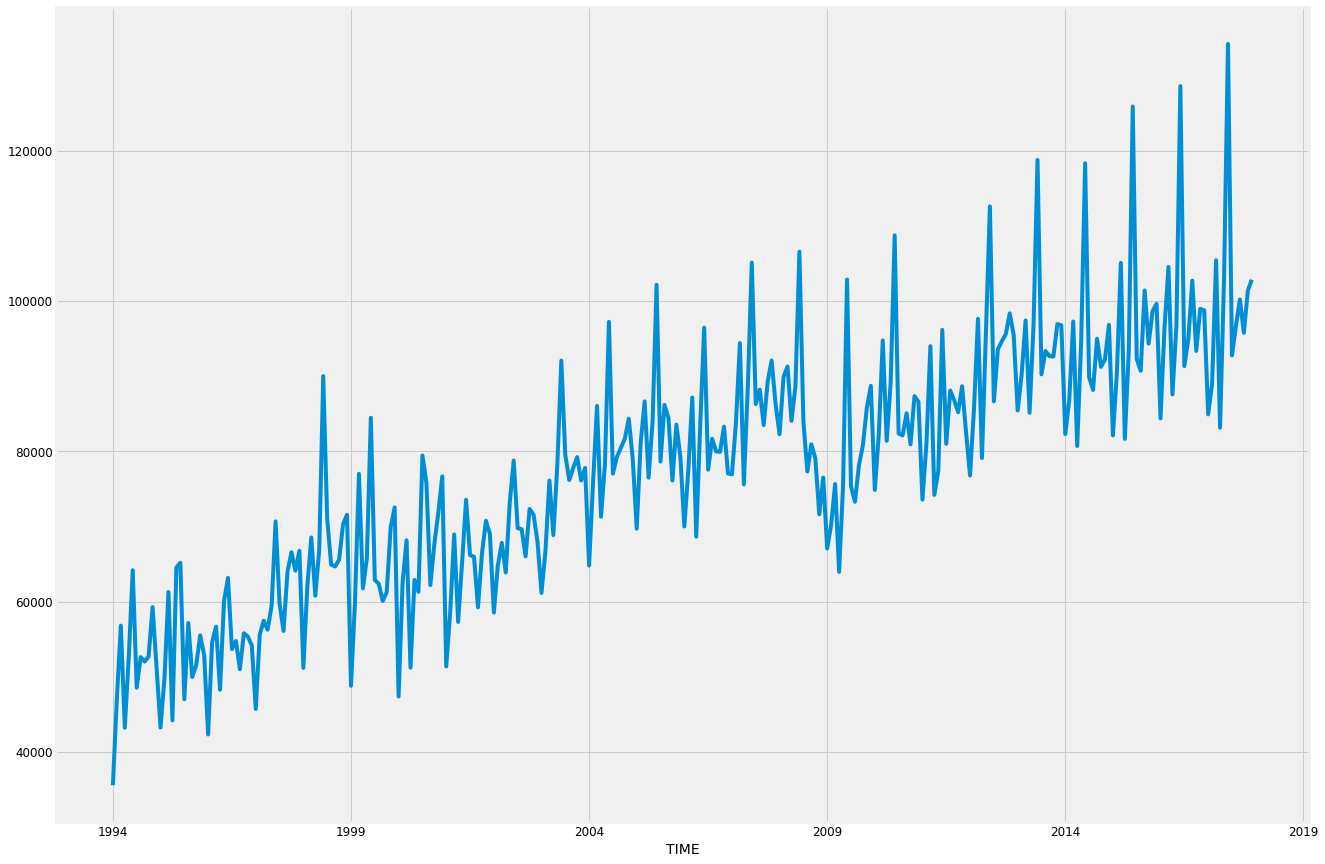

In [9]:
y = all_cars_all_region['Value']

y.plot(figsize=(20, 15),x = None)
plt.show()

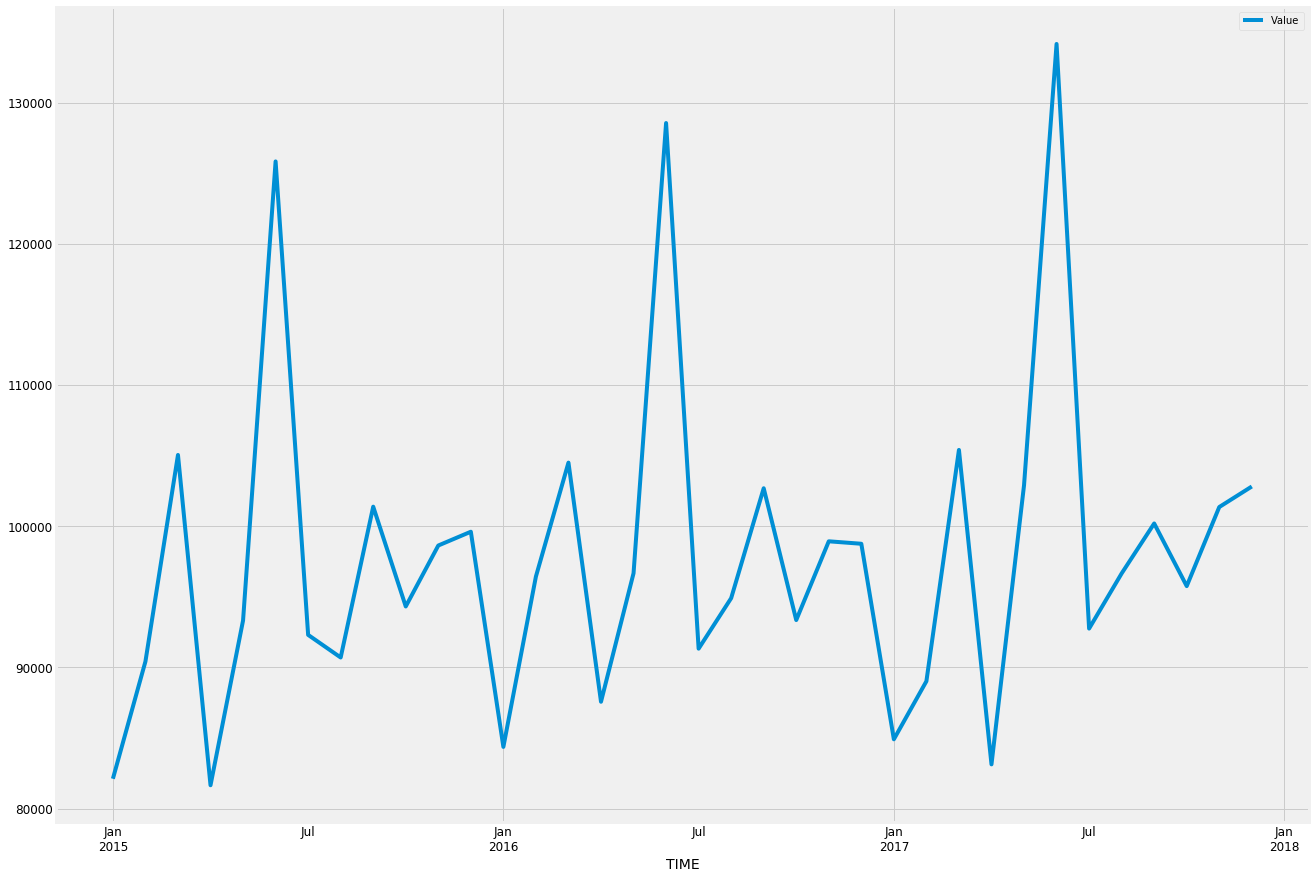

In [10]:
z = all_cars_all_region['2015-01-01':'2017-12-01']

z.plot(figsize = (20,15),x = None)
plt.show()

In [11]:
"""from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()"""

"from pylab import rcParams\nrcParams['figure.figsize'] = 18, 8\n\ndecomposition = sm.tsa.seasonal_decompose(y, model='additive')\nfig = decomposition.plot()\nplt.show()"

In [12]:
all_cars_all_region.to_csv = ("/home/paul/Documents/Portfolio/New_vehicle_sales/test.xls")

In [13]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [31]:
results_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            warnings.filterwarnings("ignore")
            results_list.append(results.aic)

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print("lowest result is " + str(min(results_list)))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7293.293369312979
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6815.078143900661
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5643.460985883648
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5393.229683485892
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5648.249615304498
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5619.83710706473
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5408.357711483104
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5390.889959479369
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7070.676989709407
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6722.307461993595
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5549.687148257799
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5298.961945427468
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6744.487690038421
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6697.5946667617645
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5340.107258081442
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5300.355784227131
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6180.9815862504765
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5792.313461934212
ARIMA(0, 

In [15]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5214      0.034    -15.465      0.000      -0.588      -0.455
sigma2      2.939e+07   3.43e-10   8.56e+16      0.000    2.94e+07    2.94e+07


/home/paul/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


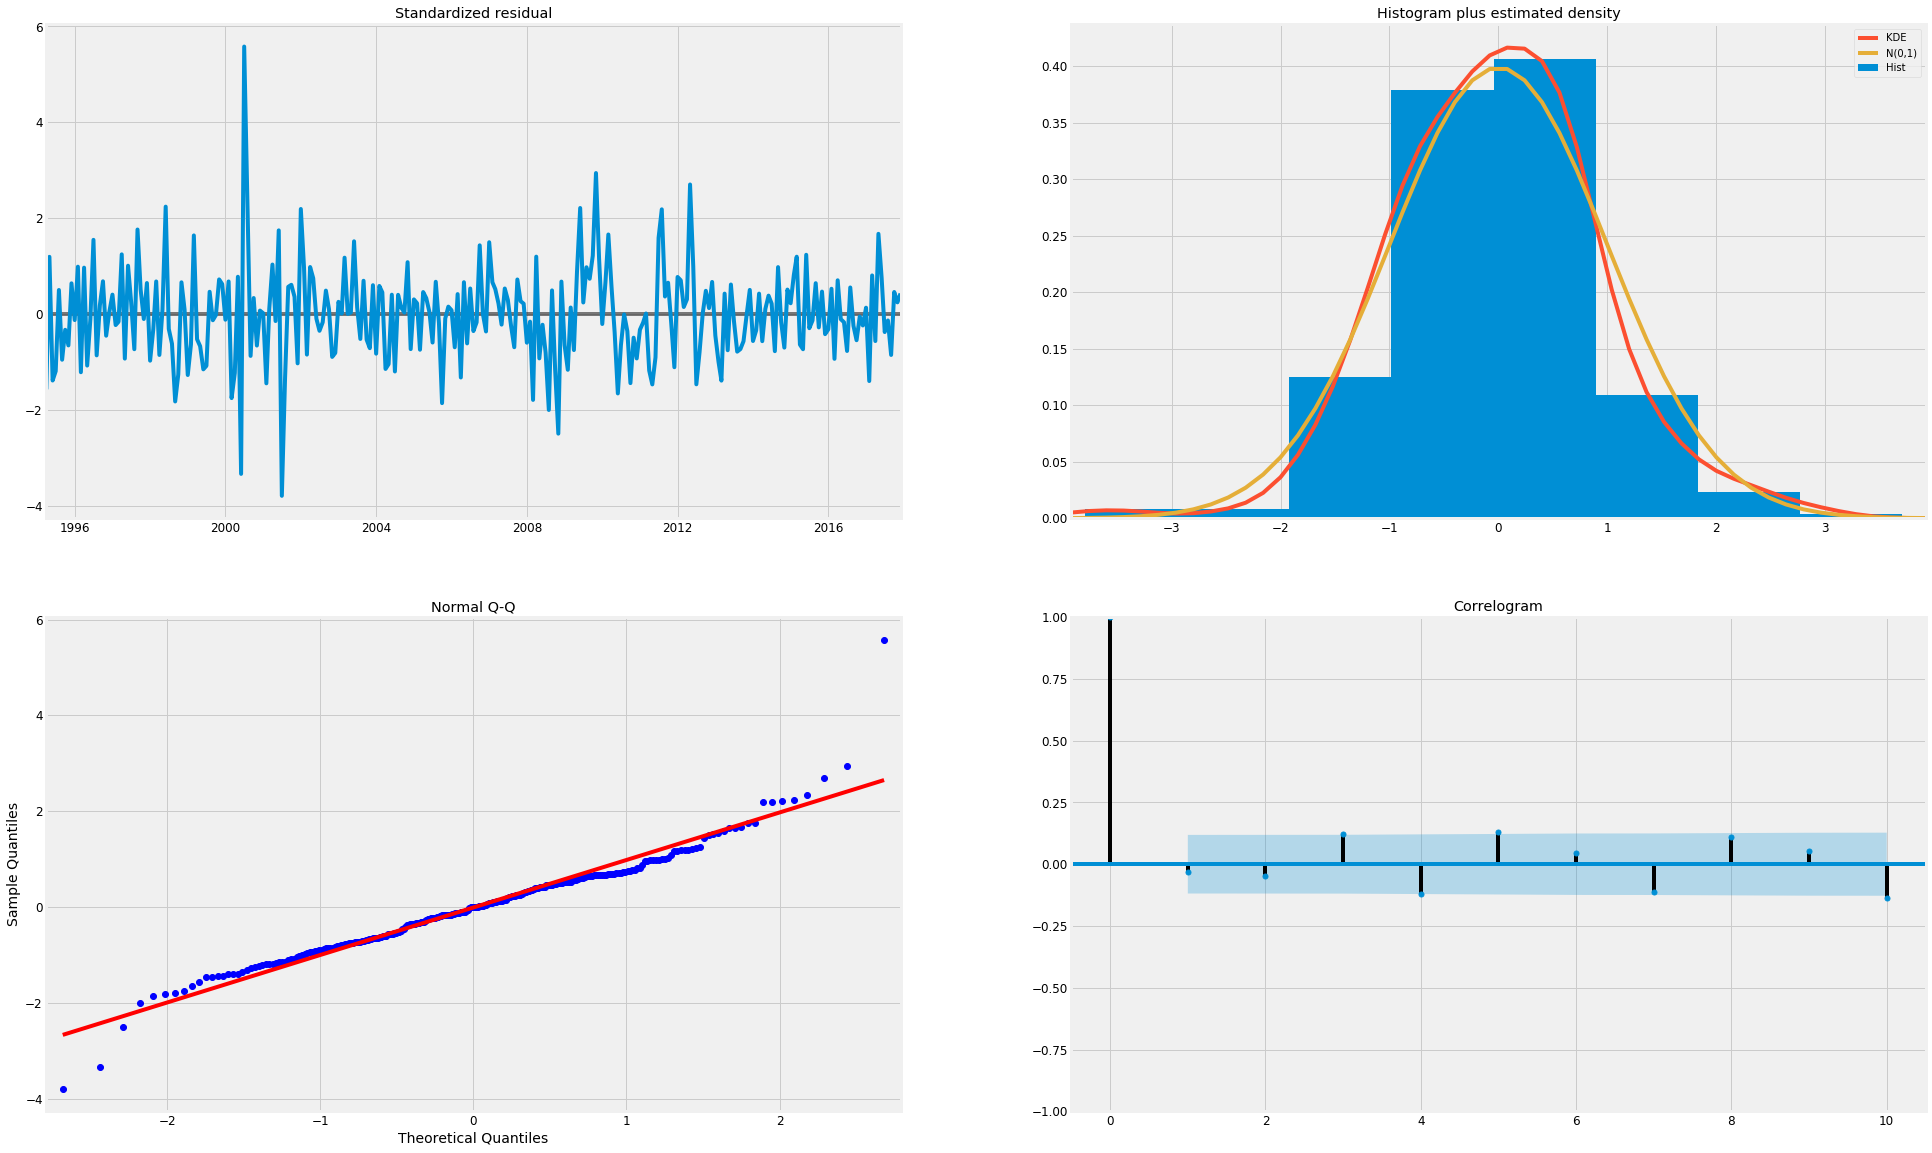

In [16]:
results.plot_diagnostics(figsize=(30, 20))
plt.show()

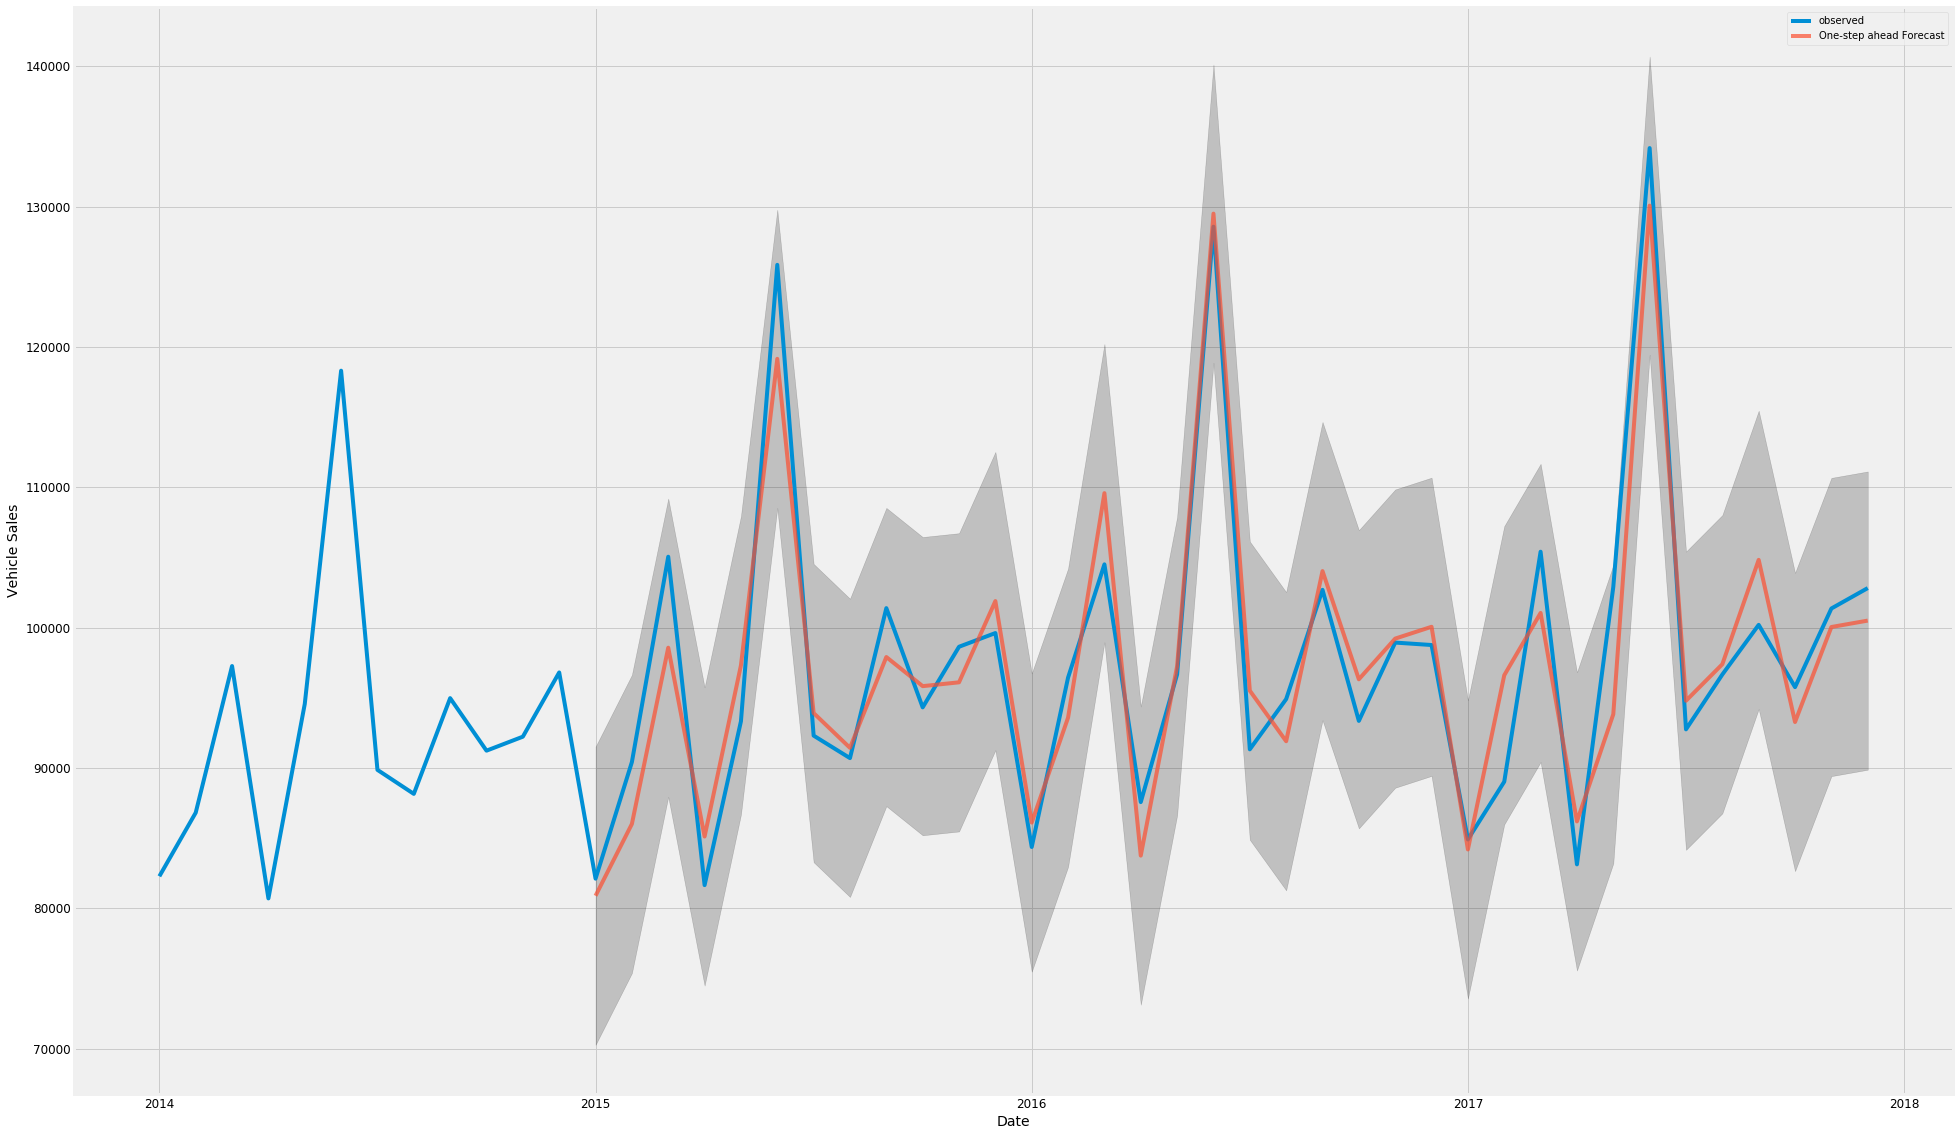

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(30, 20))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Vehicle Sales')
plt.legend()

plt.show()

In [18]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 13367054.56


In [19]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse),2)))

The Root Mean Squared Error of our forecasts is 3656.1


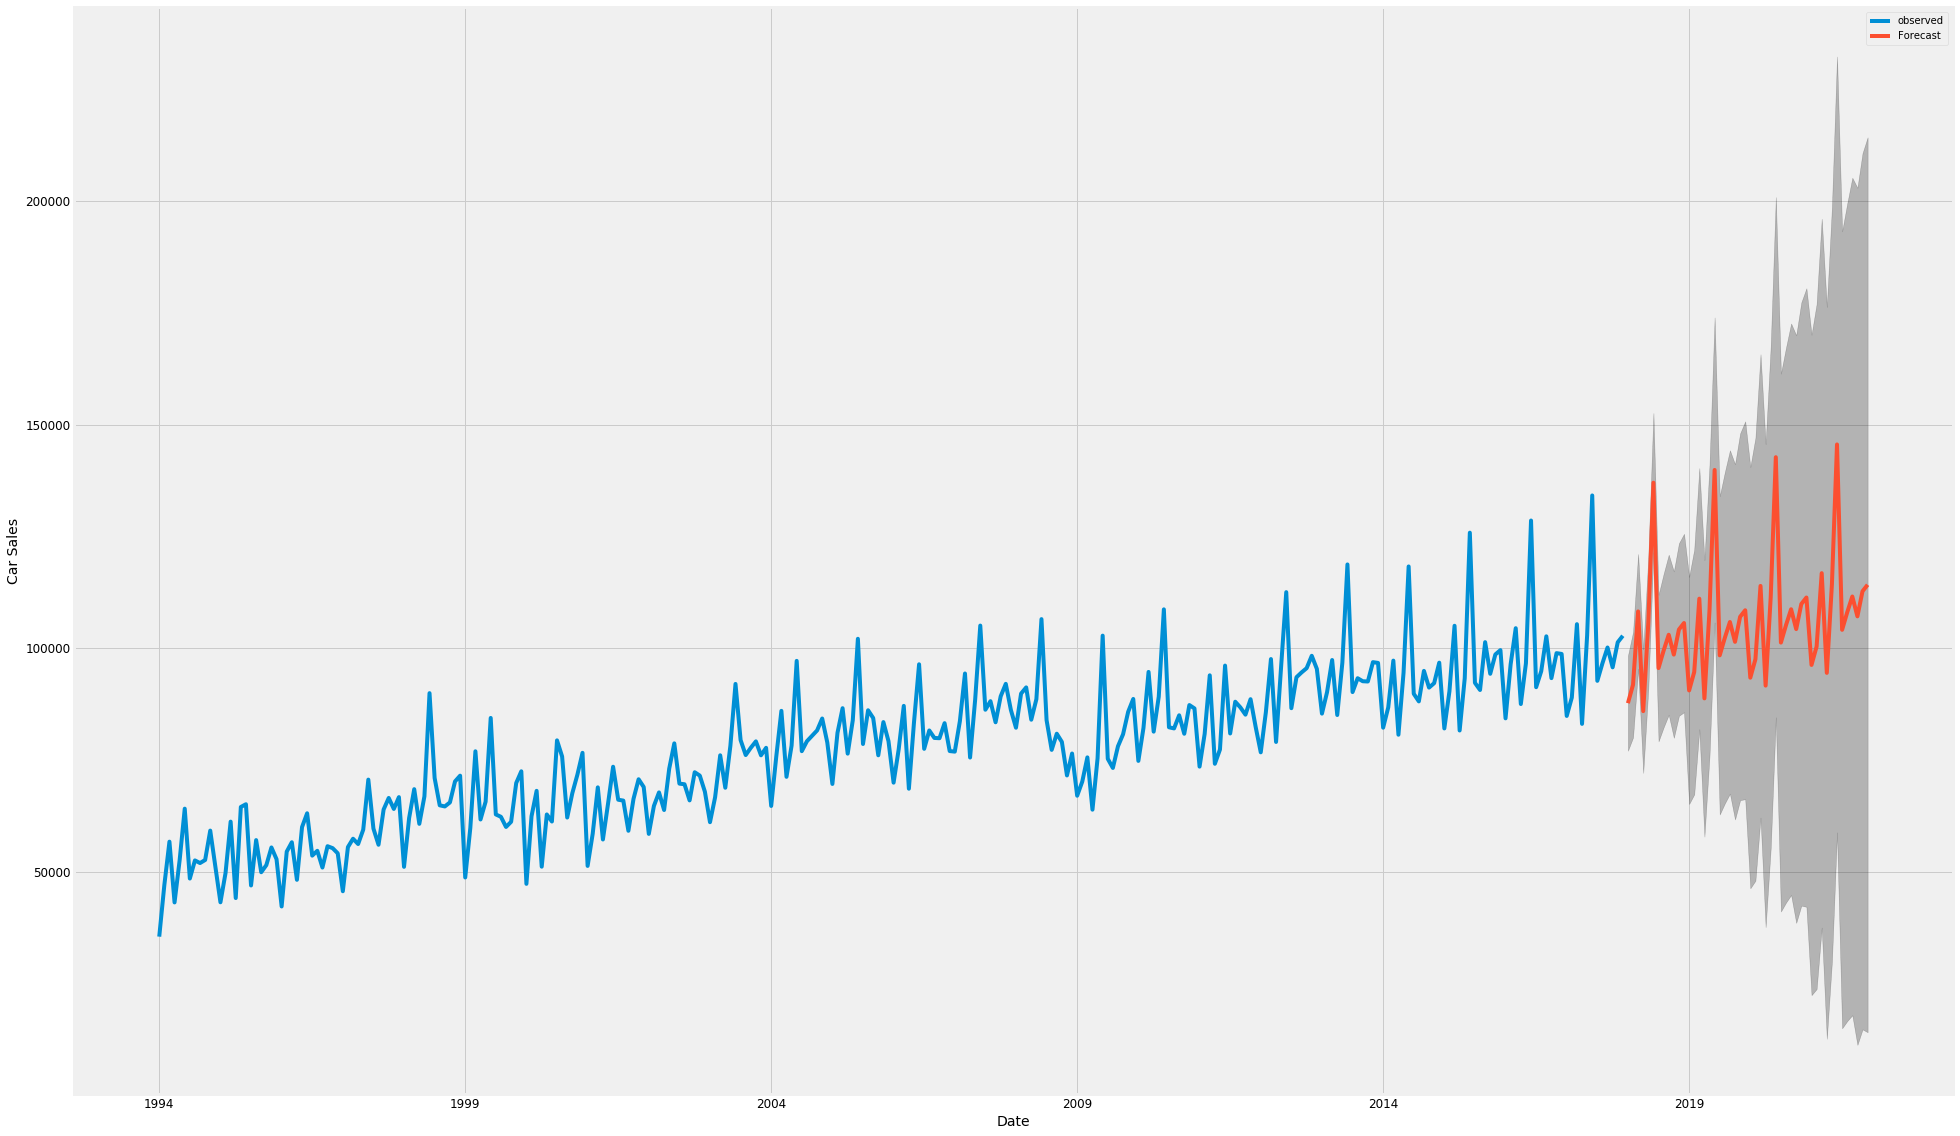

In [20]:
pred_uc = results.get_forecast(steps = 48)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (30, 20))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Car Sales')


plt.legend()
plt.show()

In [21]:
pred_uc2 = results.get_forecast(steps = 10)
print('2018 Prediction')
print(pred_uc2.predicted_mean)


print('\n \n \n')
print('2018 YTD actual data')
df2 = pd.read_excel("/home/paul/Documents/Portfolio/New_vehicle_sales/2018YTD.xls")
print(df2)

2018 Prediction
2018-01-01     87759.061044
2018-02-01     91874.061044
2018-03-01    108259.061044
2018-04-01     85984.061044
2018-05-01    105750.061044
2018-06-01    137020.061044
2018-07-01     95603.061044
2018-08-01     99511.061044
2018-09-01    103049.061044
2018-10-01     98612.061044
Freq: MS, dtype: float64

 
 

2018 YTD actual data
        TIME   Value
0 2018-01-01   88551
1 2018-02-01   95999
2 2018-03-01  106988
3 2018-04-01   82930
4 2018-05-01  100754
5 2018-06-01  130300
6 2018-07-01   85551
7 2018-08-01   95221
8 2018-09-01   94711
9 2018-10-01   90718


In [22]:
pre = pred_uc2.predicted_mean
prediction = pd.DataFrame(data = [pred_uc2.predicted_mean], columns = ['TIME', 'Value'])
prediction2 = pd.DataFrame(pred_uc2.predicted_mean)

print('df2 type    ' + str(type(df2)) + '\n \n')

print('prediction type    ' + str(type(prediction)) + '\n \n')
print(prediction2)
prediction2.to_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/2018forecast.xls")
print('prediction2 type    ' + str(type(prediction2)) + '\n \n')

df2 type    <class 'pandas.core.frame.DataFrame'>
 

prediction type    <class 'pandas.core.frame.DataFrame'>
 

                        0
2018-01-01   87759.061044
2018-02-01   91874.061044
2018-03-01  108259.061044
2018-04-01   85984.061044
2018-05-01  105750.061044
2018-06-01  137020.061044
2018-07-01   95603.061044
2018-08-01   99511.061044
2018-09-01  103049.061044
2018-10-01   98612.061044
prediction2 type    <class 'pandas.core.frame.DataFrame'>
 



In [23]:
prediction2 = pd.read_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/2018forecast.xls")
prediction2.columns = ['TIME', 'Value']
print(prediction2)

         TIME          Value
0  2018-01-01   87759.061044
1  2018-02-01   91874.061044
2  2018-03-01  108259.061044
3  2018-04-01   85984.061044
4  2018-05-01  105750.061044
5  2018-06-01  137020.061044
6  2018-07-01   95603.061044
7  2018-08-01   99511.061044
8  2018-09-01  103049.061044
9  2018-10-01   98612.061044


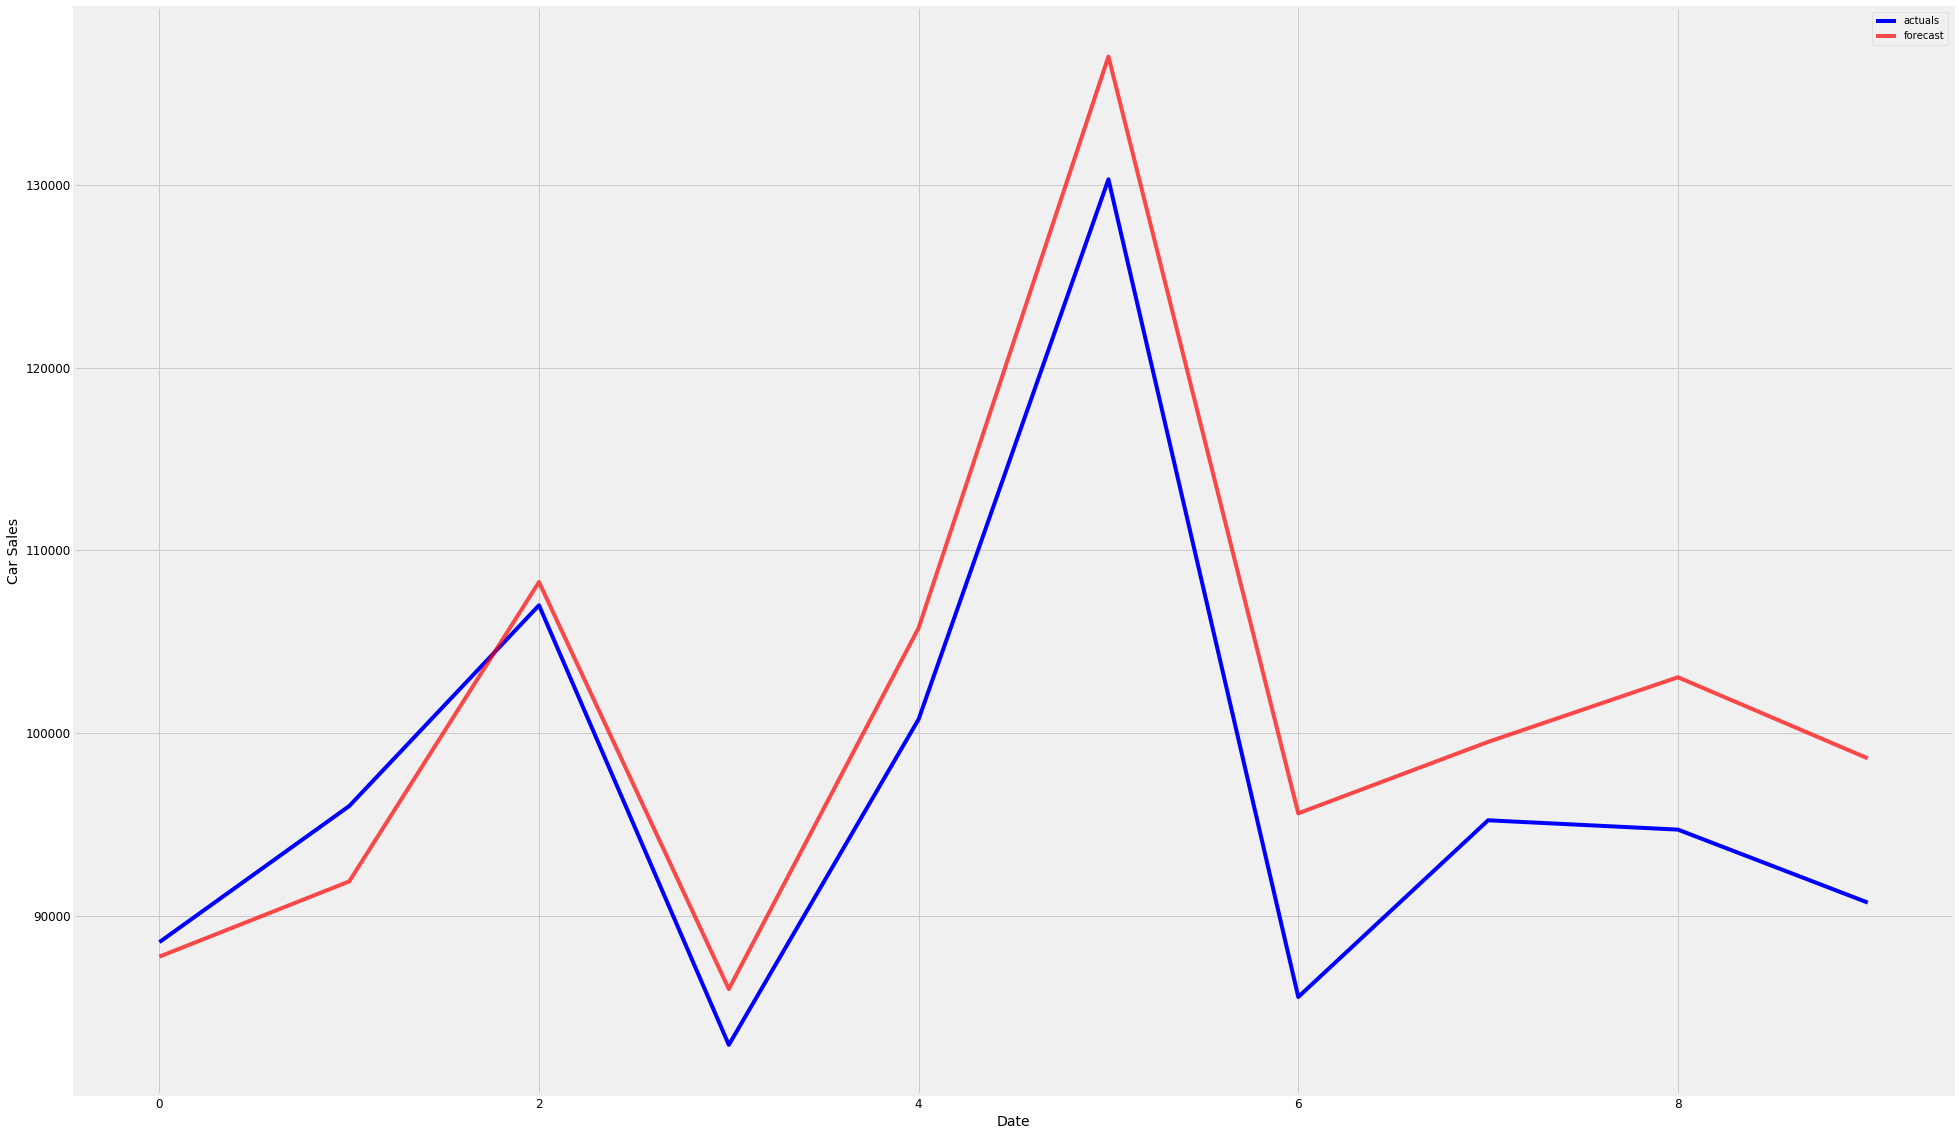

In [24]:
ax = df2['Value'].plot(label = 'actuals', color = 'b')
prediction2['Value'].plot(ax = ax, label = 'forecast',color = 'r', alpha = 0.7, figsize = (30, 20))

ax.set_xlabel('Date')
ax.set_ylabel('Car Sales')

plt.legend()
plt.show()

In [25]:
prediction_total = int(prediction2['Value'].sum())
actuals_total = round(df2['Value'].sum(), 2)
variance = round(prediction_total - actuals_total, 2)
variance_percentage = round(((prediction_total / actuals_total) - 1) * 100, 2)
print('total prediction YTD for 2018 was ' + str(prediction_total))
print('total actuals YTD for 2018 was ' + str(actuals_total))
print('total variance is ' + str(variance) + ' or ' + str(variance_percentage) + '%')

total prediction YTD for 2018 was 1013421
total actuals YTD for 2018 was 971723
total variance is 41698 or 4.29%


In [26]:
prediction_4_year = pd.DataFrame(pred_uc.predicted_mean)
prediction_4_year.to_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/4_year_forecast_all.xls")

In [27]:
prediction_4_year = pd.read_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/4_year_forecast_all.xls")
prediction_4_year.columns = ['TIME', 'Value']
print('2 Year Prediction \n')

print(prediction_4_year)
prediction_4_year.to_csv("/home/paul/Documents/Portfolio/New_vehicle_sales/4_year_forecast_all.xls")

2 Year Prediction 

          TIME          Value
0   2018-01-01   87759.061044
1   2018-02-01   91874.061044
2   2018-03-01  108259.061044
3   2018-04-01   85984.061044
4   2018-05-01  105750.061044
5   2018-06-01  137020.061044
6   2018-07-01   95603.061044
7   2018-08-01   99511.061044
8   2018-09-01  103049.061044
9   2018-10-01   98612.061044
10  2018-11-01  104214.061044
11  2018-12-01  105669.061044
12  2019-01-01   90608.122089
13  2019-02-01   94723.122089
14  2019-03-01  111108.122089
15  2019-04-01   88833.122089
16  2019-05-01  108599.122089
17  2019-06-01  139869.122089
18  2019-07-01   98452.122089
19  2019-08-01  102360.122089
20  2019-09-01  105898.122089
21  2019-10-01  101461.122089
22  2019-11-01  107063.122089
23  2019-12-01  108518.122089
24  2020-01-01   93457.183133
25  2020-02-01   97572.183133
26  2020-03-01  113957.183133
27  2020-04-01   91682.183133
28  2020-05-01  111448.183133
29  2020-06-01  142718.183133
30  2020-07-01  101301.183133
31  2020-08-01  1052